<a href="https://colab.research.google.com/github/Neallaz/Machine-Learning/blob/main/Bike_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

Dataset from : https://archive.ics.uci.edu/static/public/560/seoul+bike+sharing+demand.zip

In [4]:
datset_cols=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]

In [8]:
df=pd.read_csv("SeoulBikeData.csv", encoding="ISO-8859-1")
df.head()
df=df.drop(["Date","Holiday","Seasons"],axis=1)

In [9]:
df.columns=datset_cols
df["functional"]=(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(["hour"],axis=1)


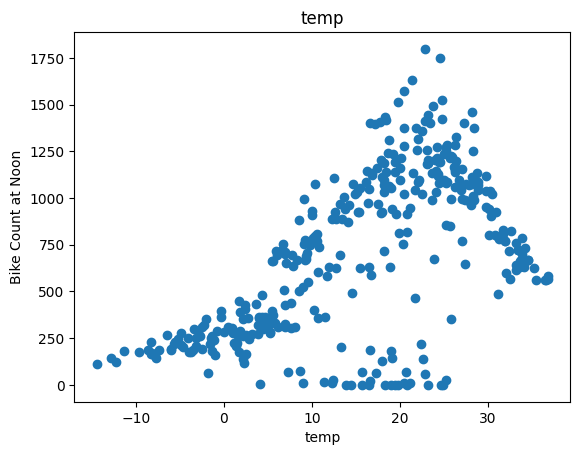

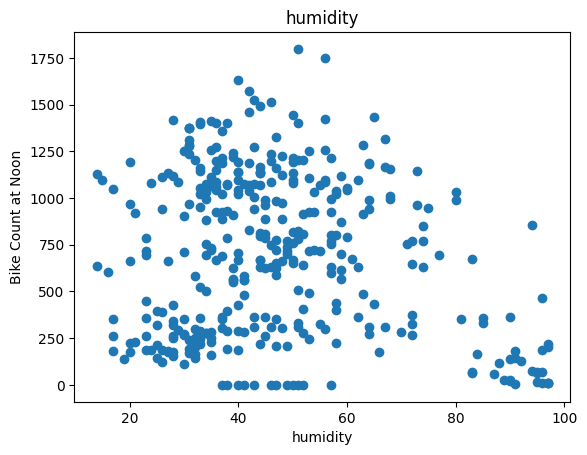

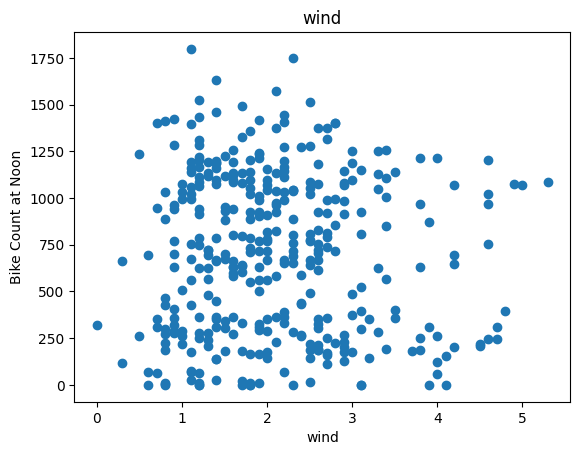

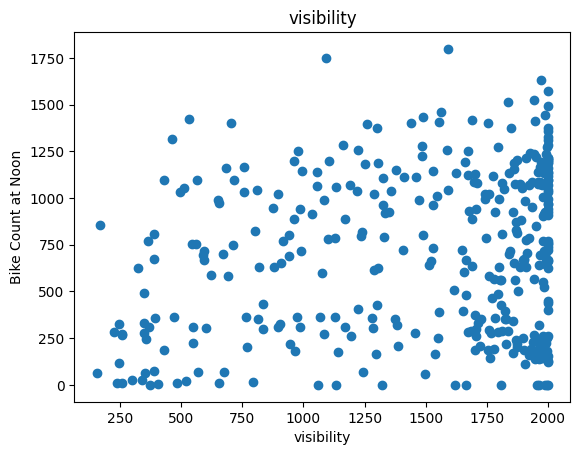

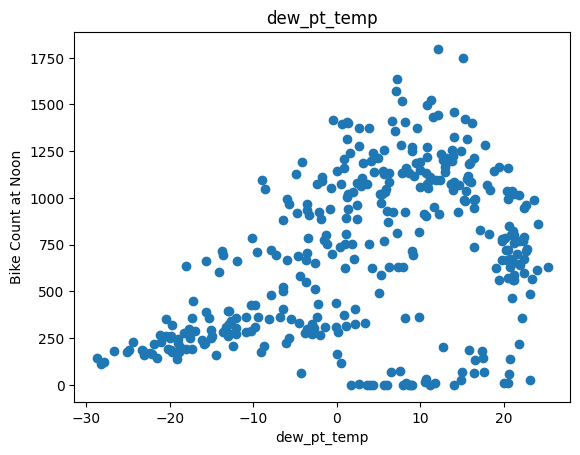

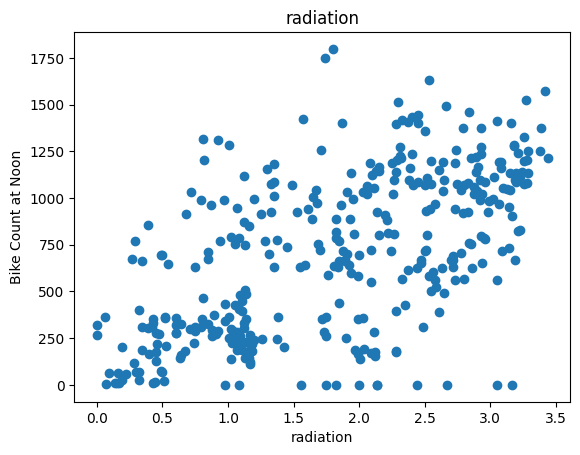

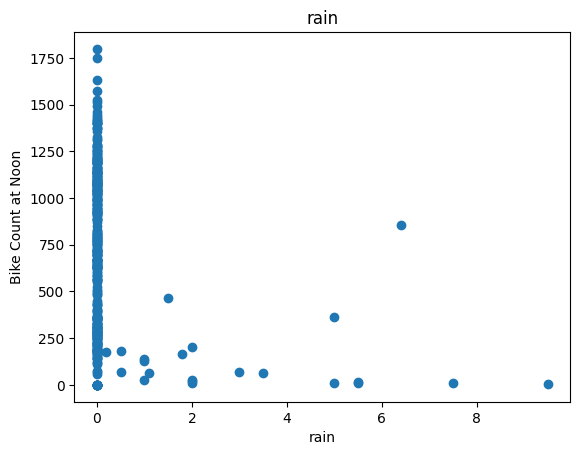

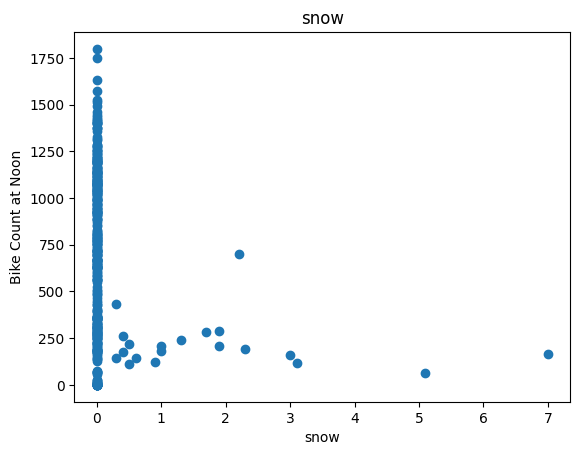

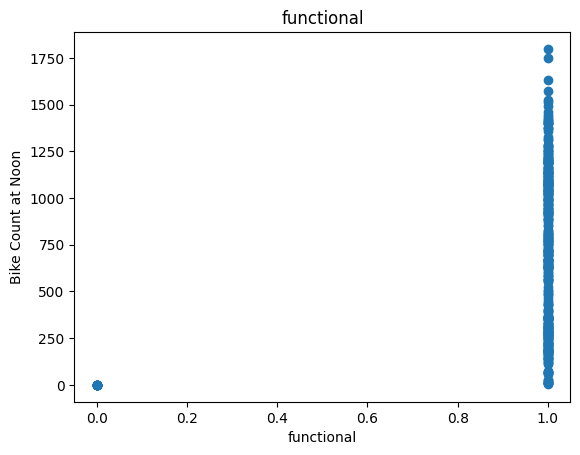

In [10]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()


In [11]:
df=df.drop(["wind","visibility","functional"],axis=1)

In [12]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


**Train/ Test /Valid dataset**

In [13]:
train,val,test=np.split(df.sample(frac=1),[int(0.6 *len(df)),int(0.8 *len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
def get_xy(dataframe,y_label,x_labels=None):
  dataframe=copy.deepcopy(dataframe)
  if x_labels is None:
    X=dataframe[[c for c in dataframe.columns if c !=y_label]].values
  else:
    X=dataframe[x_labels].values
  y=dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((X,y))

  return data,X,y

In [15]:
_,X_train_temp,y_train_temp=get_xy(train,"bike_count",x_labels=["temp"])
_,X_val_temp,y_val_temp=get_xy(val,"bike_count",x_labels=["temp"])
_,X_test_temp,y_test_temp=get_xy(test,"bike_count",x_labels=["temp"])


In [16]:
temp_reg=LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [17]:
print(temp_reg.coef_,temp_reg.intercept_)

[[19.292239]] [395.17041598]


In [18]:
temp_reg.score(X_test_temp,y_test_temp)

0.3499889208330432

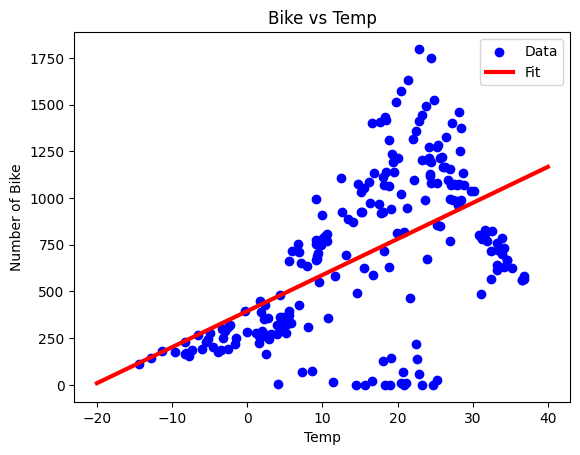

In [19]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of Bike")
plt.show()


**Multi Linear Regression**

In [20]:
train,val,test=np.split(df.sample(frac=1),[int(0.6 *len(df)),int(0.8 *len(df))])
_,X_train_all,y_train_all=get_xy(train,"bike_count",x_labels=df.columns[1:])
_,X_val_all,y_val_all=get_xy(val,"bike_count",x_labels=df.columns[1:])
_,X_test_all,y_test_all=get_xy(test,"bike_count",x_labels=df.columns[1:])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [21]:
all_reg= LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [23]:
all_reg.score(X_test_all,y_test_all)

0.3465641881555306

**#Regression with Neural Network**

In [24]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=[1,],axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
#

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=1)
])


In [26]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.MeanSquaredError(),metrics=["mae"])

In [27]:
history=temp_nn_model.fit(X_train_temp.reshape(-1),y_train_temp,verbose=0,epochs=100,validation_data=(X_val_temp,y_val_temp))

In [30]:
# def plot_loss(history):
# def plot_accuracy(history):
import matplotlib.pyplot as plt

def plot_history (history):
    """
    Plots the training and validation loss over epochs.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    """
    Plots the training and validation accuracy over epochs.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


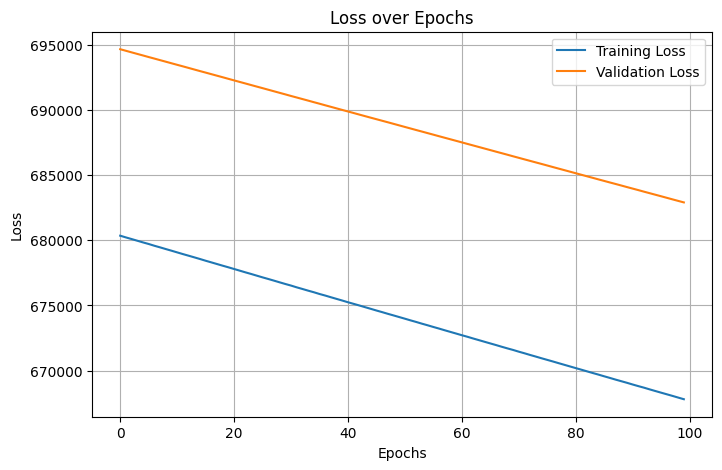

In [32]:
plot_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


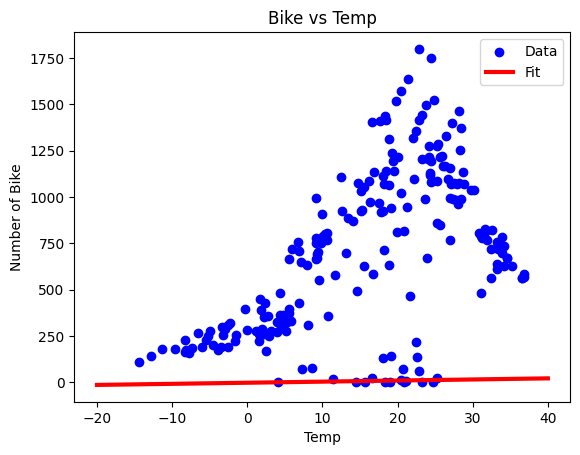

In [34]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of Bike")
plt.show()


**Neural Net**

In [43]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=[1,],axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu"),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.MeanSquaredError(),metrics=["mae"])

In [46]:
history=nn_model.fit(X_train_temp,y_train_temp,verbose=0,epochs=100,validation_data=(X_val_temp,y_val_temp))

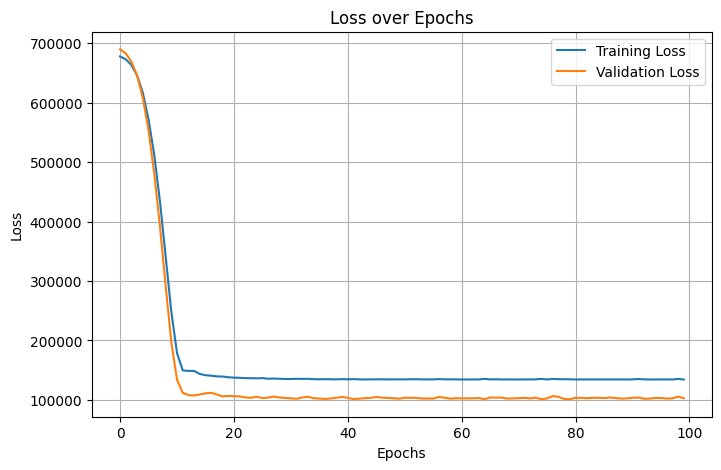

In [47]:
plot_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


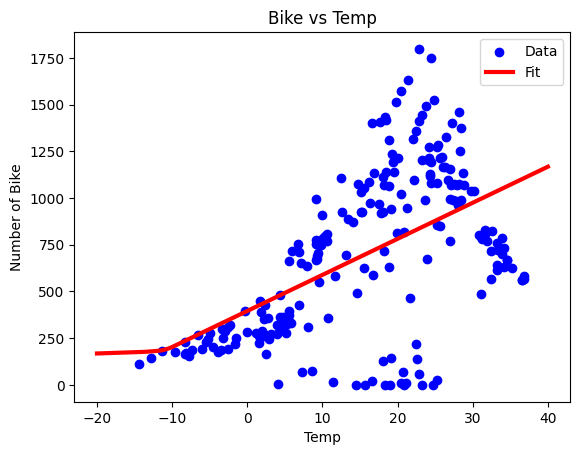

In [48]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of Bike")
plt.show()